# Master Template

In [1]:
# imports
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
import torch

# set numeric precison
pd.set_option("precision", 2)
torch.set_printoptions(precision=2, sci_mode=False)
%precision 2

# enable reload of changed files
%load_ext autoreload
%autoreload 2

# plot inline
%matplotlib inline

# Start

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data()

In [3]:
train_images.shape

(60000, 28, 28)

In [6]:
train_images = train_images[:5000]
train_labels = train_labels[:5000]

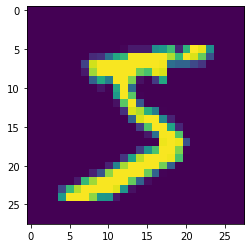

In [7]:
plt.imshow(train_images[0])

In [8]:
# 784 dimensions
28 * 28

784

In [9]:
train_images.min(), train_images.max()

(0, 255)

In [10]:
tr_imgs = train_images / 255

In [11]:
tr_imgs.min(), tr_imgs.max()

(0.0, 1.0)

# PCA

In [12]:
from sklearn.decomposition import PCA

In [13]:
pca = PCA(n_components=2)

In [14]:
tr_imgs.shape

(5000, 28, 28)

In [15]:
tr_imgs = tr_imgs.reshape(-1, 28 * 28)
tr_imgs.shape

(5000, 784)

In [16]:
dim_2d = pca.fit_transform(tr_imgs)

In [17]:
dim_2d.shape

(5000, 2)

In [18]:
labels = train_labels.reshape(-1,1)
labels.shape

(5000, 1)

In [19]:
df = pd.DataFrame(np.hstack([dim_2d, labels]))
df.columns = ['one', 'two', 'label']
df.head(3)

,one,two,label
0,0.46,1.45,5.0
1,4.07,1.52,0.0
2,-0.11,-1.78,4.0


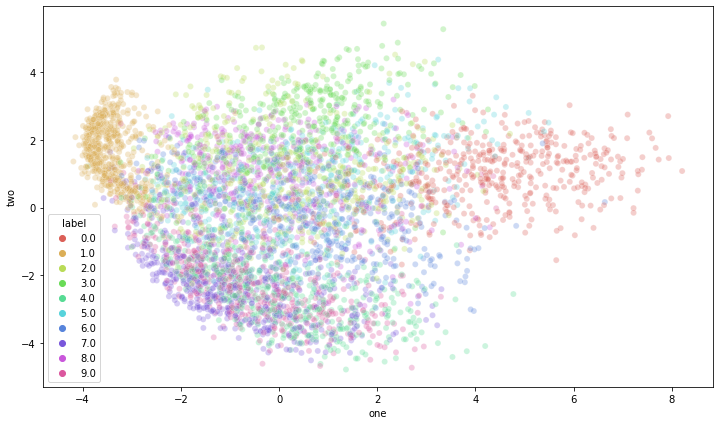

In [20]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x="one", y="two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df,
    legend="full",
    alpha=0.3
);

# TSNE

In [21]:
from sklearn.manifold import TSNE

In [22]:
tsne = TSNE(n_components=2, n_jobs=-1)
tsne_2d = tsne.fit_transform(tr_imgs)

In [23]:
df1 = pd.DataFrame(np.hstack([tsne_2d, labels]))
df1.columns = ['one', 'two', 'label']
df1.head(3)

,one,two,label
0,11.28,-31.03,5.0
1,68.13,-15.30,0.0
2,-26.12,-52.59,4.0


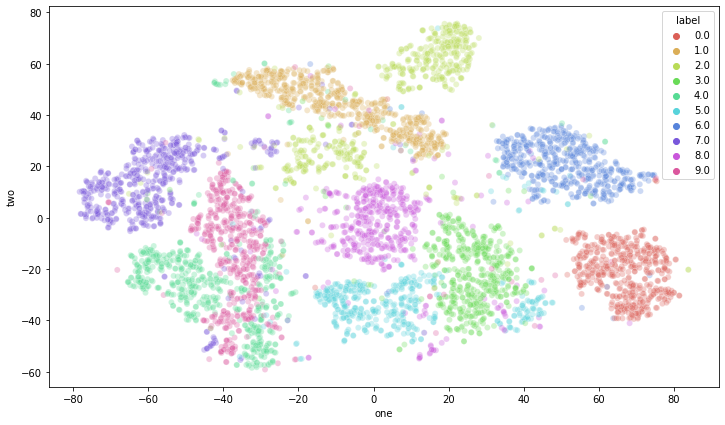

In [24]:
plt.figure(figsize=(12, 7))
sns.scatterplot(
    x="one", y="two",
    hue="label",
    palette=sns.color_palette("hls", 10),
    data=df1,
    legend="full",
    alpha=0.3
);